In [192]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from scipy import stats
from scipy.stats import zscore
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.manifold import TSNE
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier

In [3]:
data= pd.read_csv("genre.csv")

/var/folders/45/d0jt1g0523n27wc_qzf0j05c0000gn/T/ipykernel_27890/2754549670.py:1: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  data= pd.read_csv("genre.csv")


In [4]:
data.head()

danceability  energy  key  loudness  mode  speechiness  acousticness  \
0         0.831   0.814    2    -7.364     1       0.4200        0.0598   
1         0.719   0.493    8    -7.230     1       0.0794        0.4010   
2         0.850   0.893    5    -4.783     1       0.0623        0.0138   
3         0.476   0.781    0    -4.710     1       0.1030        0.0237   
4         0.798   0.624    2    -7.668     1       0.2930        0.2170   

   instrumentalness  liveness  valence  ...                      id  \
0          0.013400    0.0556   0.3890  ...  2Vc6NJ9PW9gD9q343XFRKx   
1          0.000000    0.1180   0.1240  ...  7pgJBLVz5VmnL7uGHmRj6p   
2          0.000004    0.3720   0.0391  ...  0vSWgAlfpye0WCGeNmuNhy   
3          0.000000    0.1140   0.1750  ...  0VSXnJqQkwuH2ei1nOQ1nu   
4          0.000000    0.1660   0.5910  ...  4jCeguq9rMTlbMmPHuO7S3   

                                    uri  \
0  spotify:track:2Vc6NJ9PW9gD9q343XFRKx   
1  spotify:track:7pgJBLVz5VmnL7uGHmRj6p   
2  spotify:track:0vSWgAlfpye0WCGeNmuNhy   
3  spotify:track:0VSXnJqQkwuH2ei1nOQ1nu   
4  spotify:track:4jCeguq9rMTlbMmPHuO7S3   

                                          track_href  \
0  https://api.spotify.com/v1/tracks/2Vc6NJ9PW9gD...   
1  https://api.spotify.com/v1/tracks/7pgJBLVz5Vmn...   
2  https://api.spotify.com/v1/tracks/0vSWgAlfpye0...   
3  https://api.spotify.com/v1/tracks/0VSXnJqQkwuH...   
4  https://api.spotify.com/v1/tracks/4jCeguq9rMTl...   

                                        analysis_url duration_ms  \
0  https://api.spotify.com/v1/audio-analysis/2Vc6...      124539   
1  https://api.spotify.com/v1/audio-analysis/7pgJ...      224427   
2  https://api.spotify.com/v1/audio-analysis/0vSW...       98821   
3  https://api.spotify.com/v1/audio-analysis/0VSX...      123661   
4  https://api.spotify.com/v1/audio-analysis/4jCe...      123298   

  time_signature      genre                                      song_name  \
0              4  Dark Trap                            Mercury: Retrograde   
1              4  Dark Trap                                      Pathology   
2              4  Dark Trap                                       Symbiote   
3              3  Dark Trap  ProductOfDrugs (Prod. The Virus and Antidote)   
4              4  Dark Trap                                          Venom   

  Unnamed: 0 title  
0        NaN   NaN  
1        NaN   NaN  
2        NaN   NaN  
3        NaN   NaN  
4        NaN   NaN  

[5 rows x 22 columns]

In [5]:
data.shape

(42305, 22)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42305 entries, 0 to 42304
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      42305 non-null  float64
 1   energy            42305 non-null  float64
 2   key               42305 non-null  int64  
 3   loudness          42305 non-null  float64
 4   mode              42305 non-null  int64  
 5   speechiness       42305 non-null  float64
 6   acousticness      42305 non-null  float64
 7   instrumentalness  42305 non-null  float64
 8   liveness          42305 non-null  float64
 9   valence           42305 non-null  float64
 10  tempo             42305 non-null  float64
 11  type              42305 non-null  object 
 12  id                42305 non-null  object 
 13  uri               42305 non-null  object 
 14  track_href        42305 non-null  object 
 15  analysis_url      42305 non-null  object 
 16  duration_ms       42305 non-null  int64 

In [7]:
data.columns

Index(['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'type', 'id', 'uri', 'track_href', 'analysis_url', 'duration_ms',
       'time_signature', 'genre', 'song_name', 'Unnamed: 0', 'title'],
      dtype='object')

In [8]:
#Checking for duplicates
duplicates= data.duplicated()
data[duplicates]

Empty DataFrame
Columns: [danceability, energy, key, loudness, mode, speechiness, acousticness, instrumentalness, liveness, valence, tempo, type, id, uri, track_href, analysis_url, duration_ms, time_signature, genre, song_name, Unnamed: 0, title]
Index: []

[0 rows x 22 columns]

In [9]:
data1= data.copy(deep=True)

In [10]:
# Dropping the irrevelant columns like music url, id, unnamed etc

data1.drop(["Unnamed: 0", "uri", "id", "track_href","analysis_url", "title", "song_name", "type"], axis=1, inplace=True)

In [11]:
data1.head()

danceability  energy  key  loudness  mode  speechiness  acousticness  \
0         0.831   0.814    2    -7.364     1       0.4200        0.0598   
1         0.719   0.493    8    -7.230     1       0.0794        0.4010   
2         0.850   0.893    5    -4.783     1       0.0623        0.0138   
3         0.476   0.781    0    -4.710     1       0.1030        0.0237   
4         0.798   0.624    2    -7.668     1       0.2930        0.2170   

   instrumentalness  liveness  valence    tempo  duration_ms  time_signature  \
0          0.013400    0.0556   0.3890  156.985       124539               4   
1          0.000000    0.1180   0.1240  115.080       224427               4   
2          0.000004    0.3720   0.0391  218.050        98821               4   
3          0.000000    0.1140   0.1750  186.948       123661               3   
4          0.000000    0.1660   0.5910  147.988       123298               4   

       genre  
0  Dark Trap  
1  Dark Trap  
2  Dark Trap  
3  Dark Trap  
4  Dark Trap

In [12]:
#Checking for missing values

data1.isna().sum()

danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
duration_ms         0
time_signature      0
genre               0
dtype: int64

In [13]:
data1.describe().T

count           mean            std           min  \
danceability      42305.0       0.639364       0.156617      0.065100   
energy            42305.0       0.762516       0.183823      0.000243   
key               42305.0       5.370240       3.666145      0.000000   
loudness          42305.0      -6.465442       2.941165    -33.357000   
mode              42305.0       0.549462       0.497553      0.000000   
speechiness       42305.0       0.136561       0.126168      0.022700   
acousticness      42305.0       0.096160       0.170827      0.000001   
instrumentalness  42305.0       0.283048       0.370791      0.000000   
liveness          42305.0       0.214079       0.175576      0.010700   
valence           42305.0       0.357101       0.233200      0.018700   
tempo             42305.0     147.474056      23.844623     57.967000   
duration_ms       42305.0  250865.846685  102957.713571  25600.000000   
time_signature    42305.0       3.972580       0.268342      1.000000   

                           25%           50%         75%         max  
danceability           0.52400       0.64600       0.766       0.988  
energy                 0.63200       0.80300       0.923       1.000  
key                    1.00000       6.00000       9.000      11.000  
loudness              -8.16100      -6.23400      -4.513       3.148  
mode                   0.00000       1.00000       1.000       1.000  
speechiness            0.04910       0.07550       0.193       0.946  
acousticness           0.00173       0.01640       0.107       0.988  
instrumentalness       0.00000       0.00594       0.722       0.989  
liveness               0.09960       0.13500       0.294       0.988  
valence                0.16100       0.32200       0.522       0.988  
tempo                129.93100     144.97300     161.464     220.290  
duration_ms       179840.00000  224760.00000  301133.000  913052.000  
time_signature         4.00000       4.00000       4.000       5.000

In [14]:
data1.nunique()

danceability          890
energy                917
key                    12
loudness            11654
mode                    2
speechiness          1447
acousticness         4602
instrumentalness     4757
liveness             1695
valence              1674
tempo               15606
duration_ms         26261
time_signature          4
genre                  15
dtype: int64

In [15]:
data1.genre.value_counts()

genre
Underground Rap    5875
Dark Trap          4578
Hiphop             3028
trance             2999
trap               2987
techhouse          2975
dnb                2966
psytrance          2961
techno             2956
hardstyle          2936
RnB                2099
Trap Metal         1956
Rap                1848
Emo                1680
Pop                 461
Name: count, dtype: int64

<Axes: xlabel='count', ylabel='genre'>

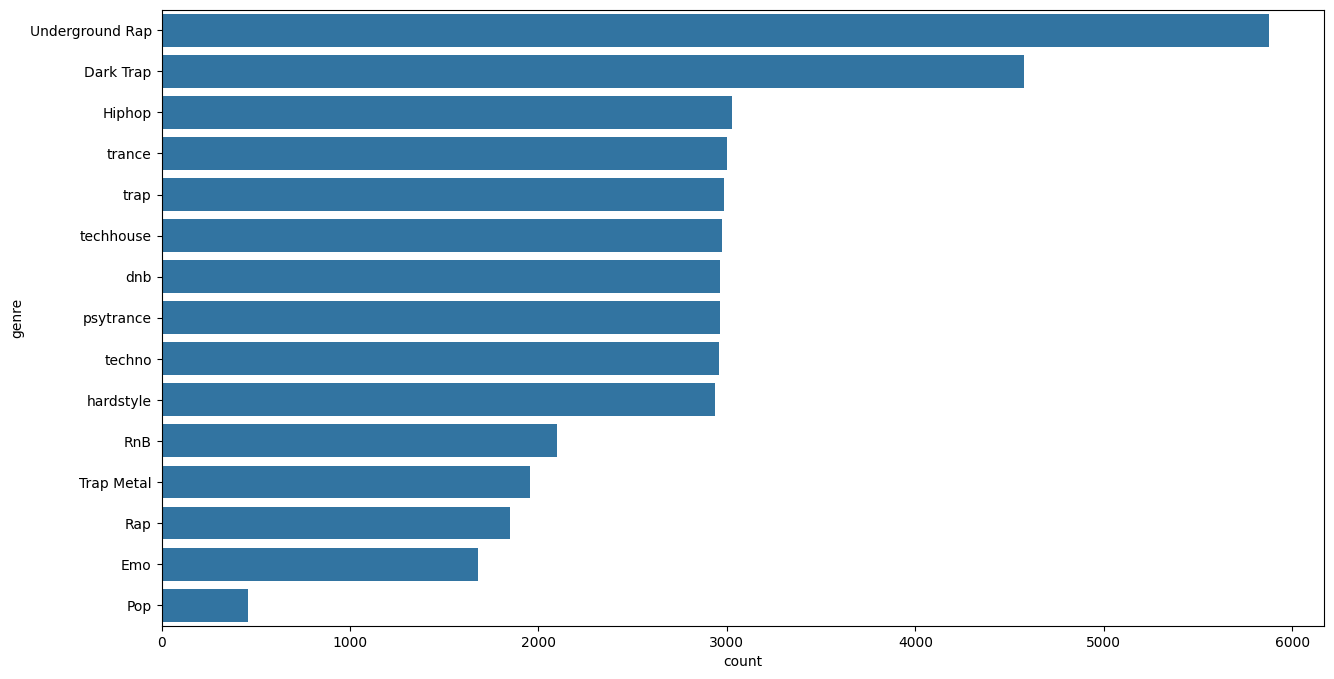

In [16]:
#Countplot of Genre types
unique_values, value_counts= np.unique(data1["genre"], return_counts=True)
ordered= data1['genre'].value_counts().index
plt.figure(figsize=(15,8))
sns.countplot(data1['genre'], order=ordered)

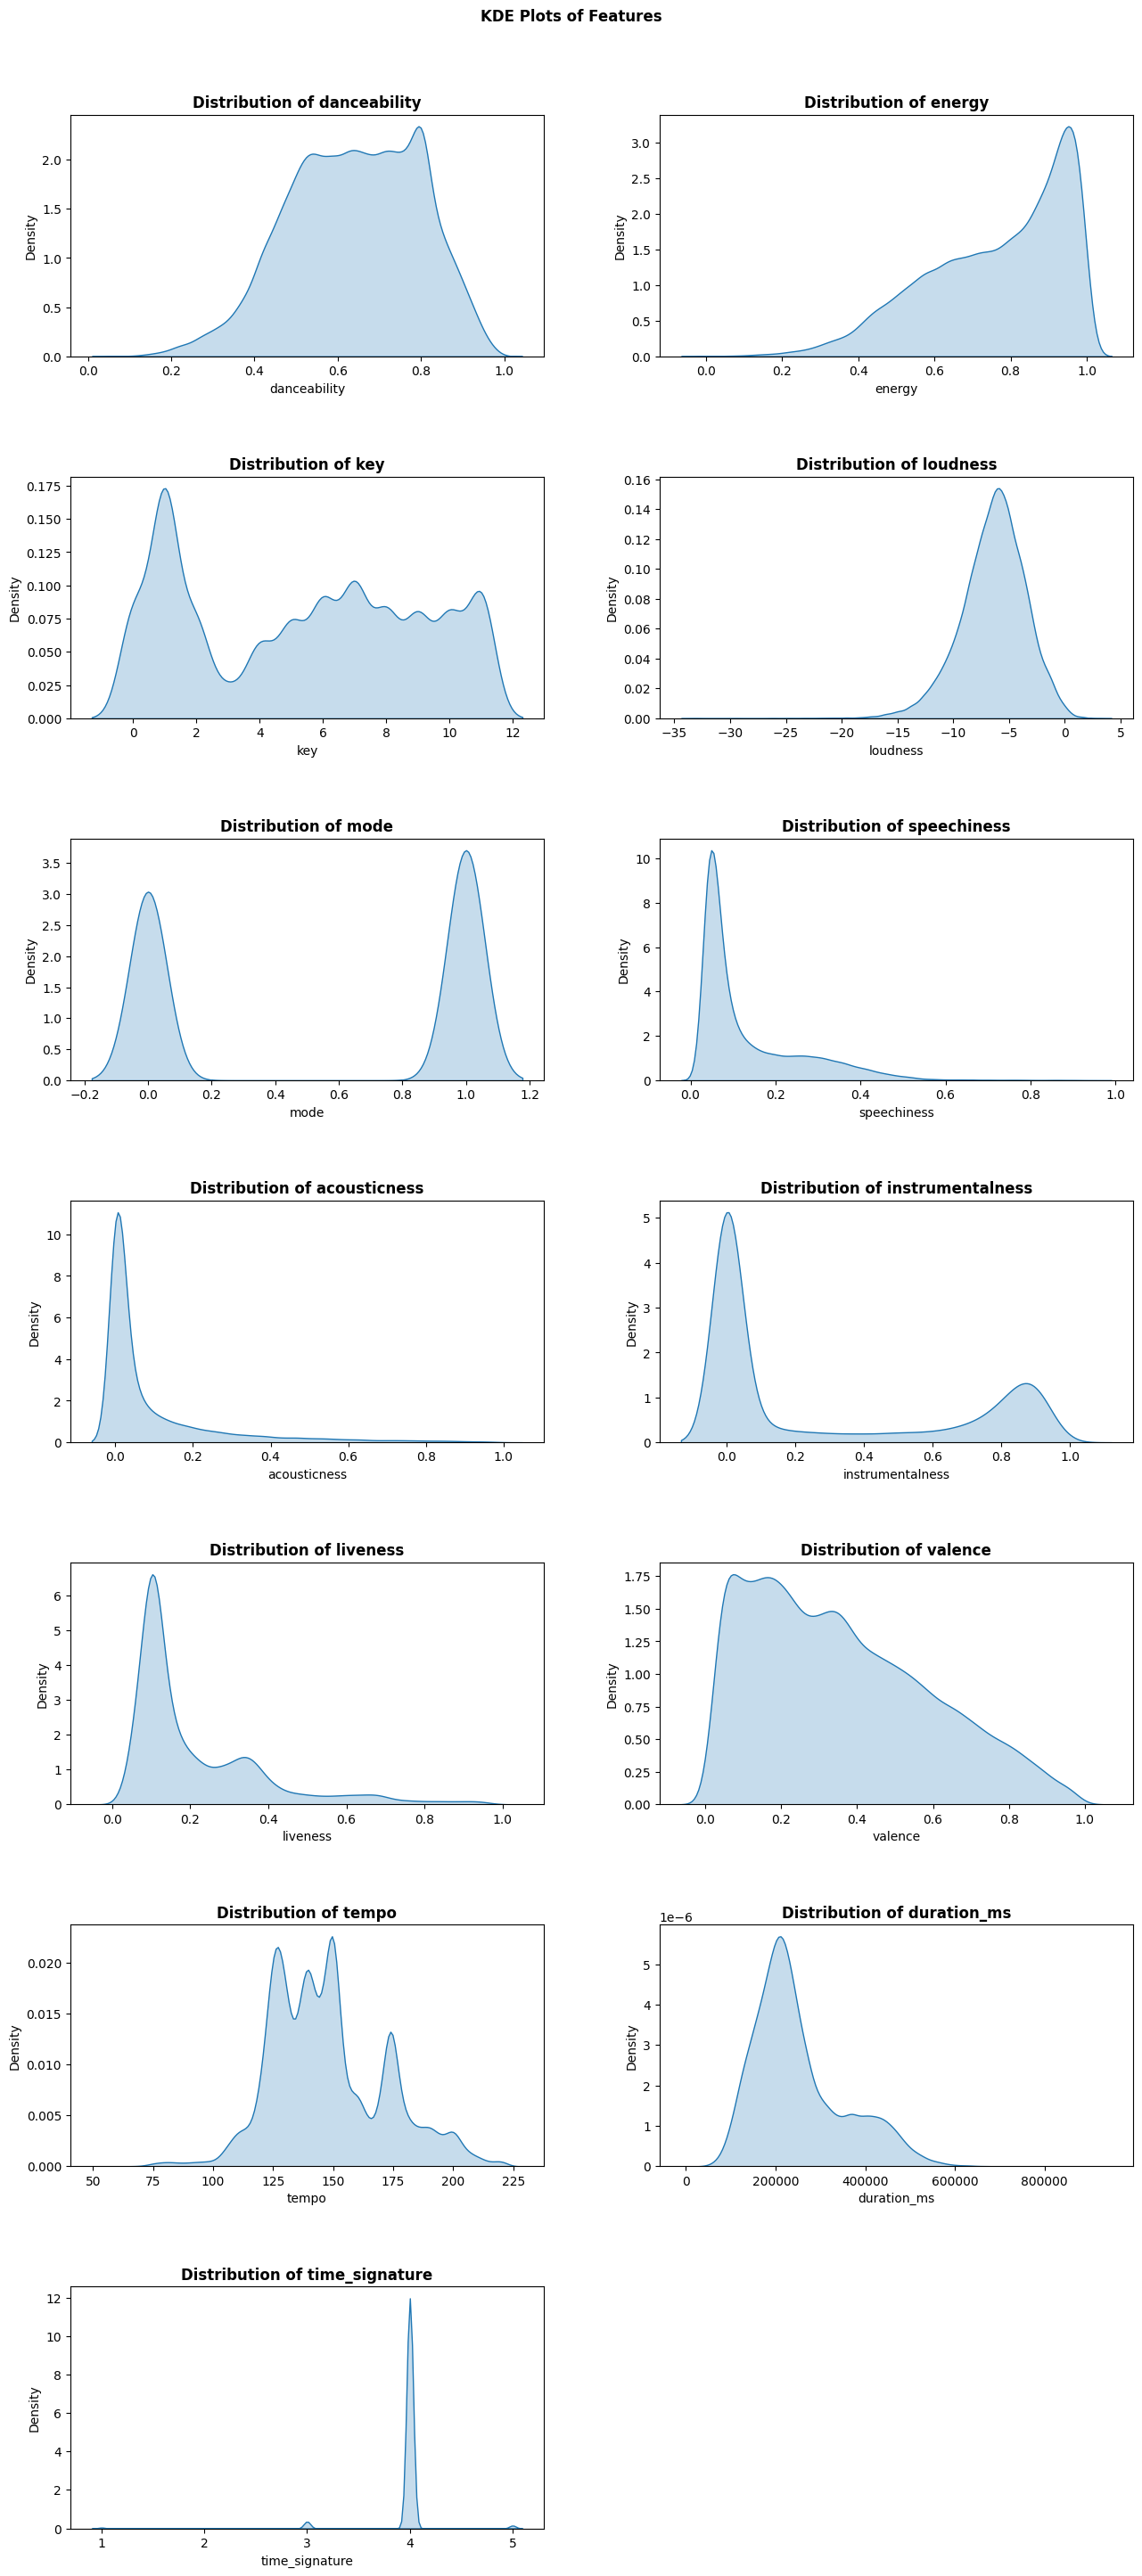

In [17]:
# Univariate Analysis
#KDE distribution of each feature
plt.figure(figsize=(14,30))
plt.suptitle("KDE Plots of Features", fontweight='bold')

for i, col in enumerate(data1.columns[:-1]):
    plt.subplot(7,2,i+1)
    sns.kdeplot(data1[col], fill=True )
    plt.title(f"Distribution of {col}", fontweight='bold')
    
    
    plt.tight_layout(pad=5)
    

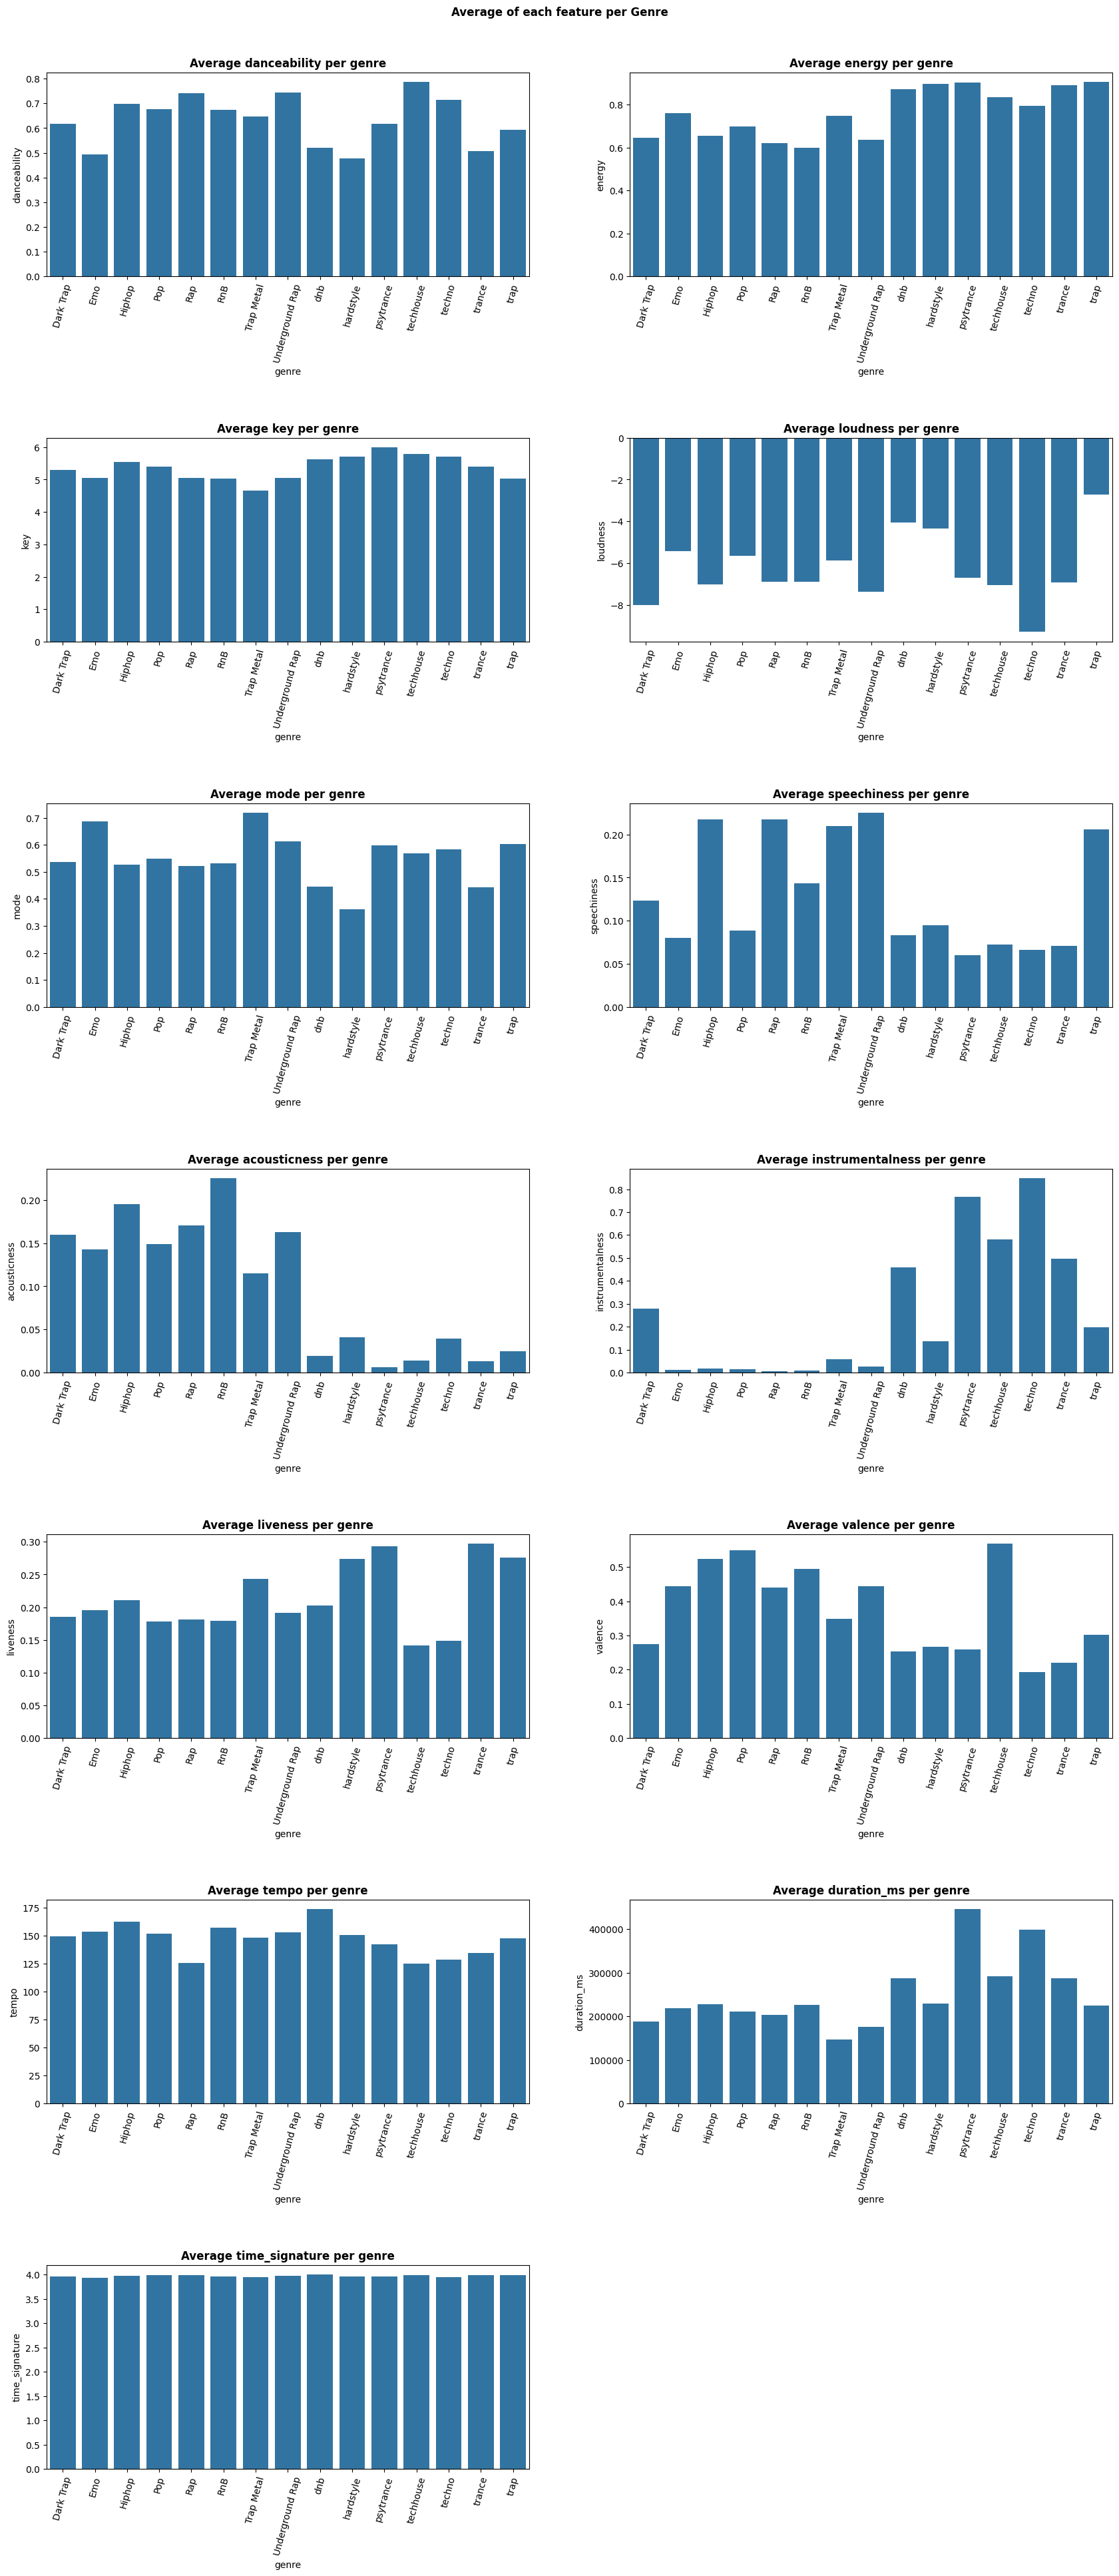

In [18]:
#Bivariate Analysis

plt.figure(figsize=(18,40))
plt.suptitle("Average of each feature per Genre", fontweight='bold')
plt.subplots_adjust(top=0.8)

for i, col in enumerate(data1.columns[:-1]):
    plt.subplot(7,2, i+1)
    avg=data1.groupby("genre")[col].mean()
    sns.barplot(avg)
    plt.title(f"Average {col} per genre", fontweight='bold')
    plt.xticks(rotation=75)
    plt.tight_layout(pad=5)

<Figure size 2000x800 with 0 Axes>

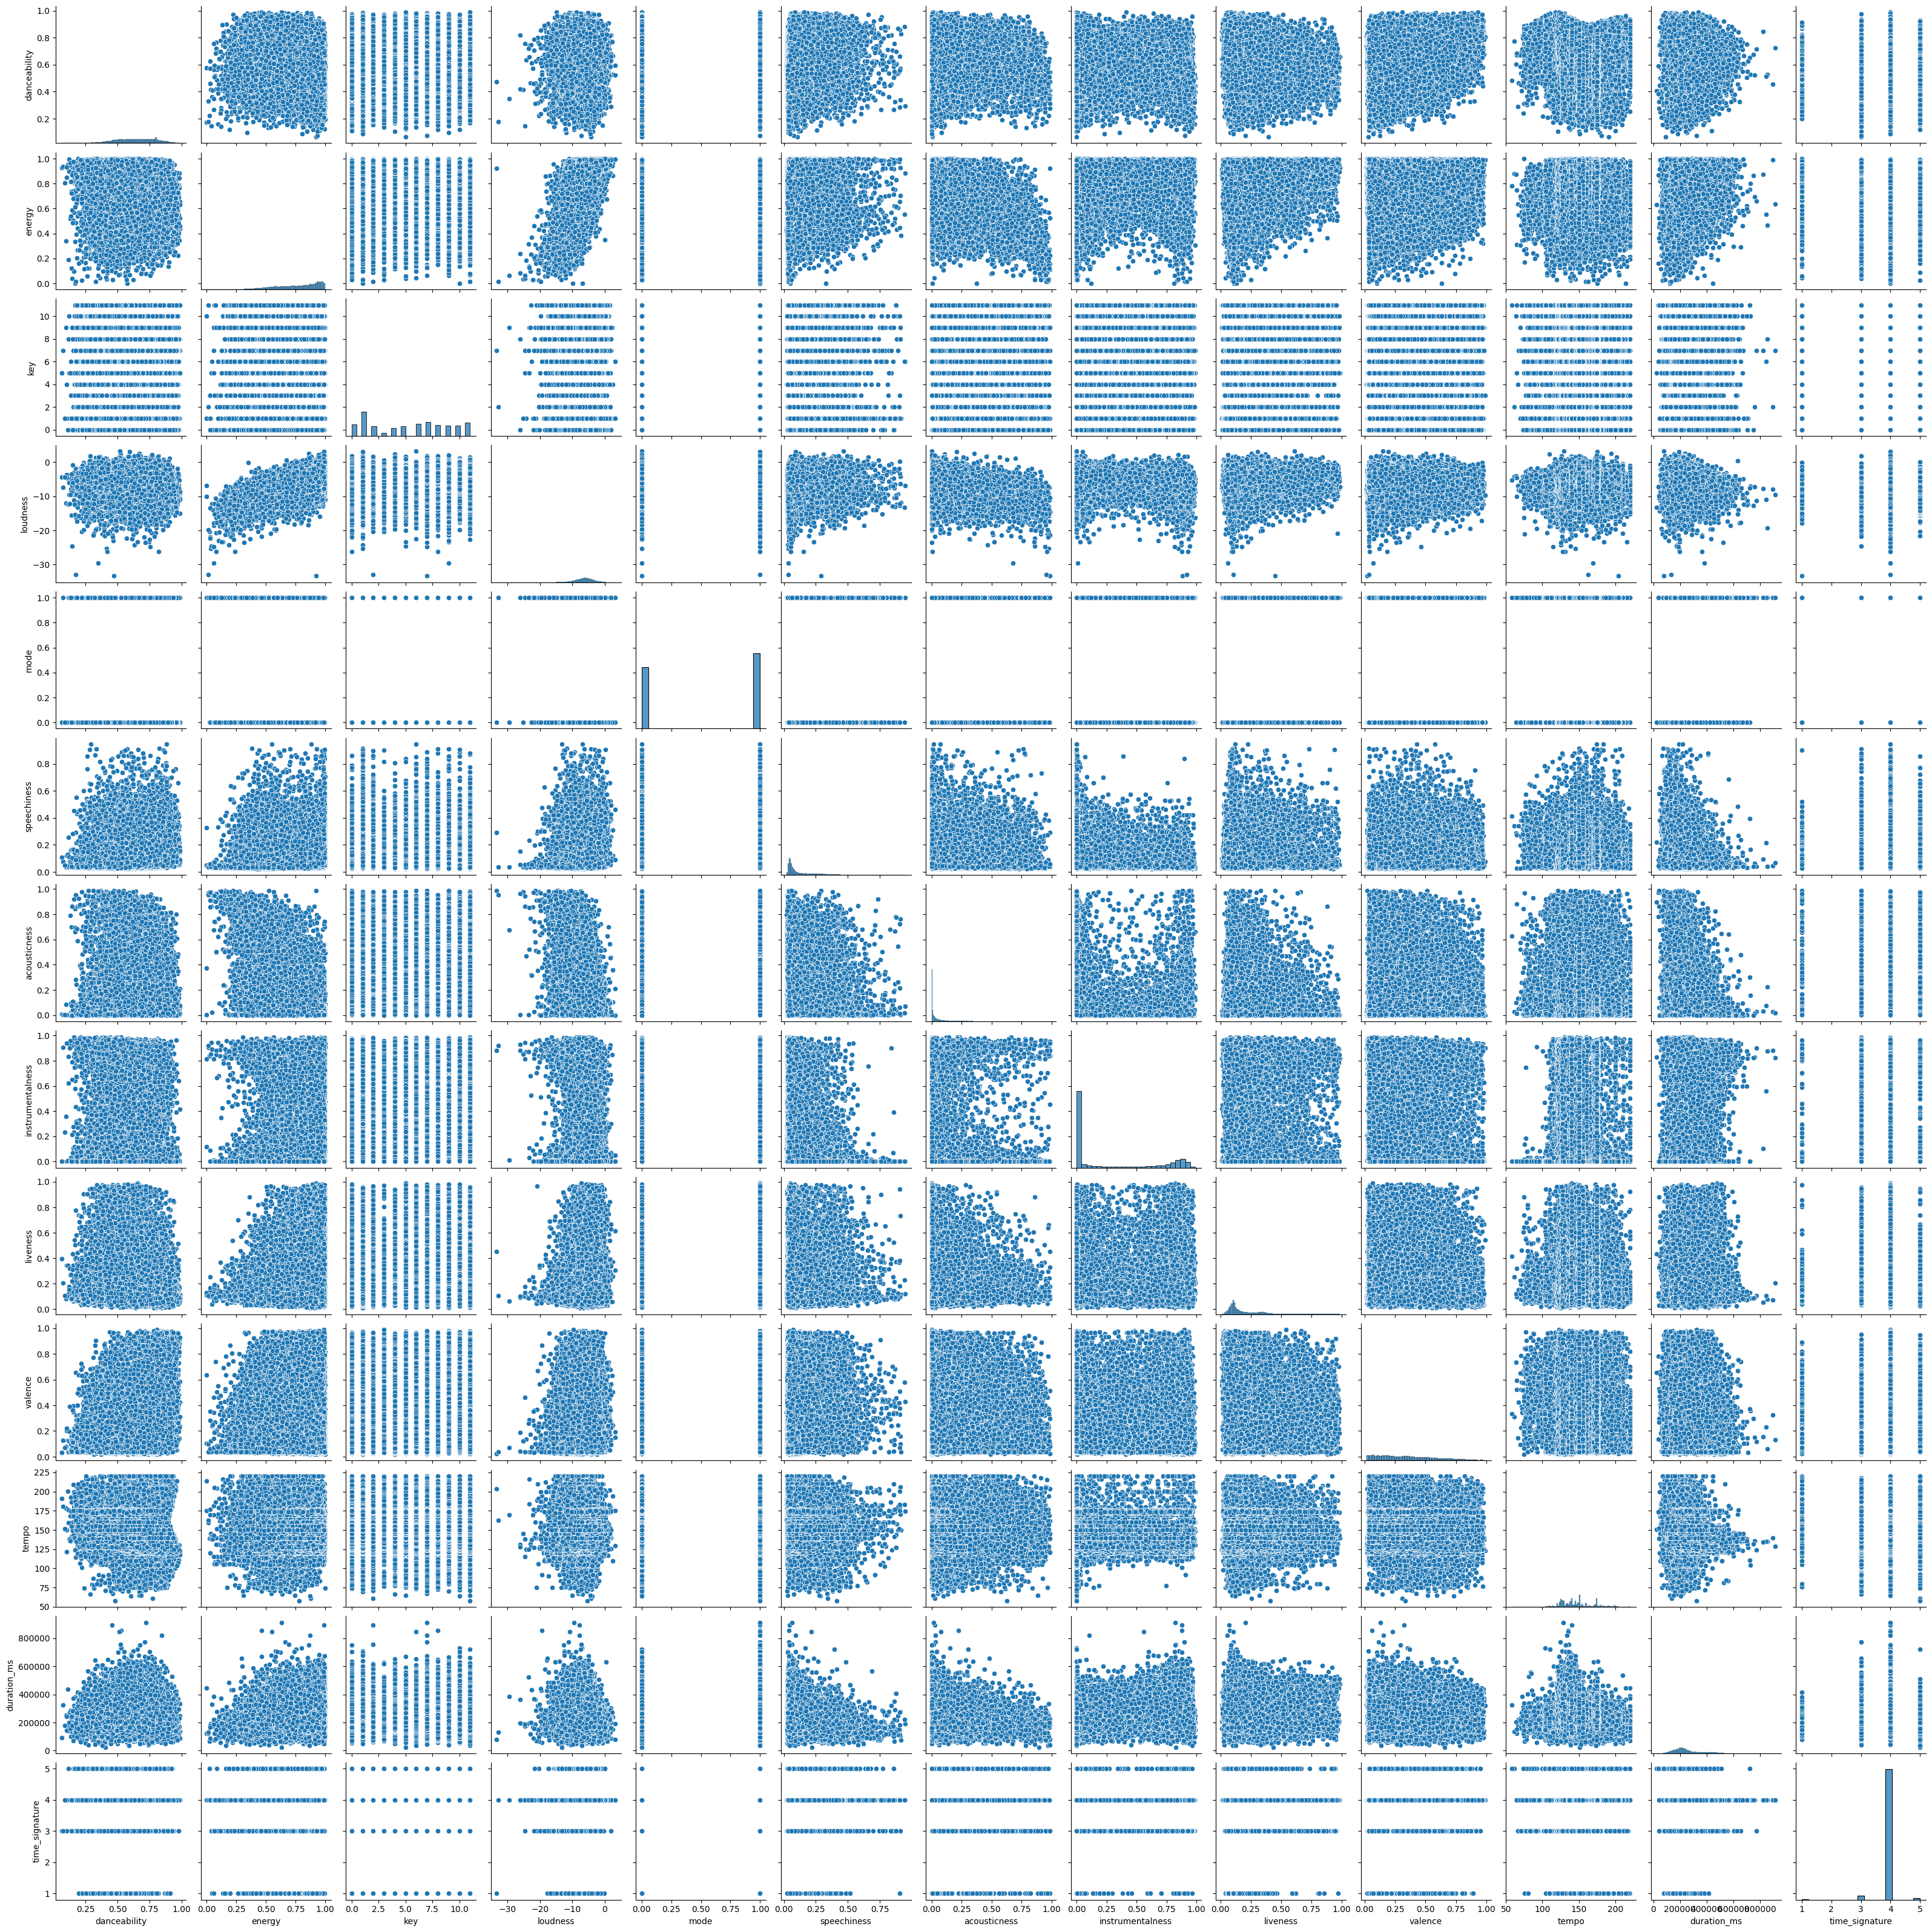

In [19]:
#Pairplot
plt.figure(figsize=(20,8))
sns.pairplot(data1)

<Axes: >

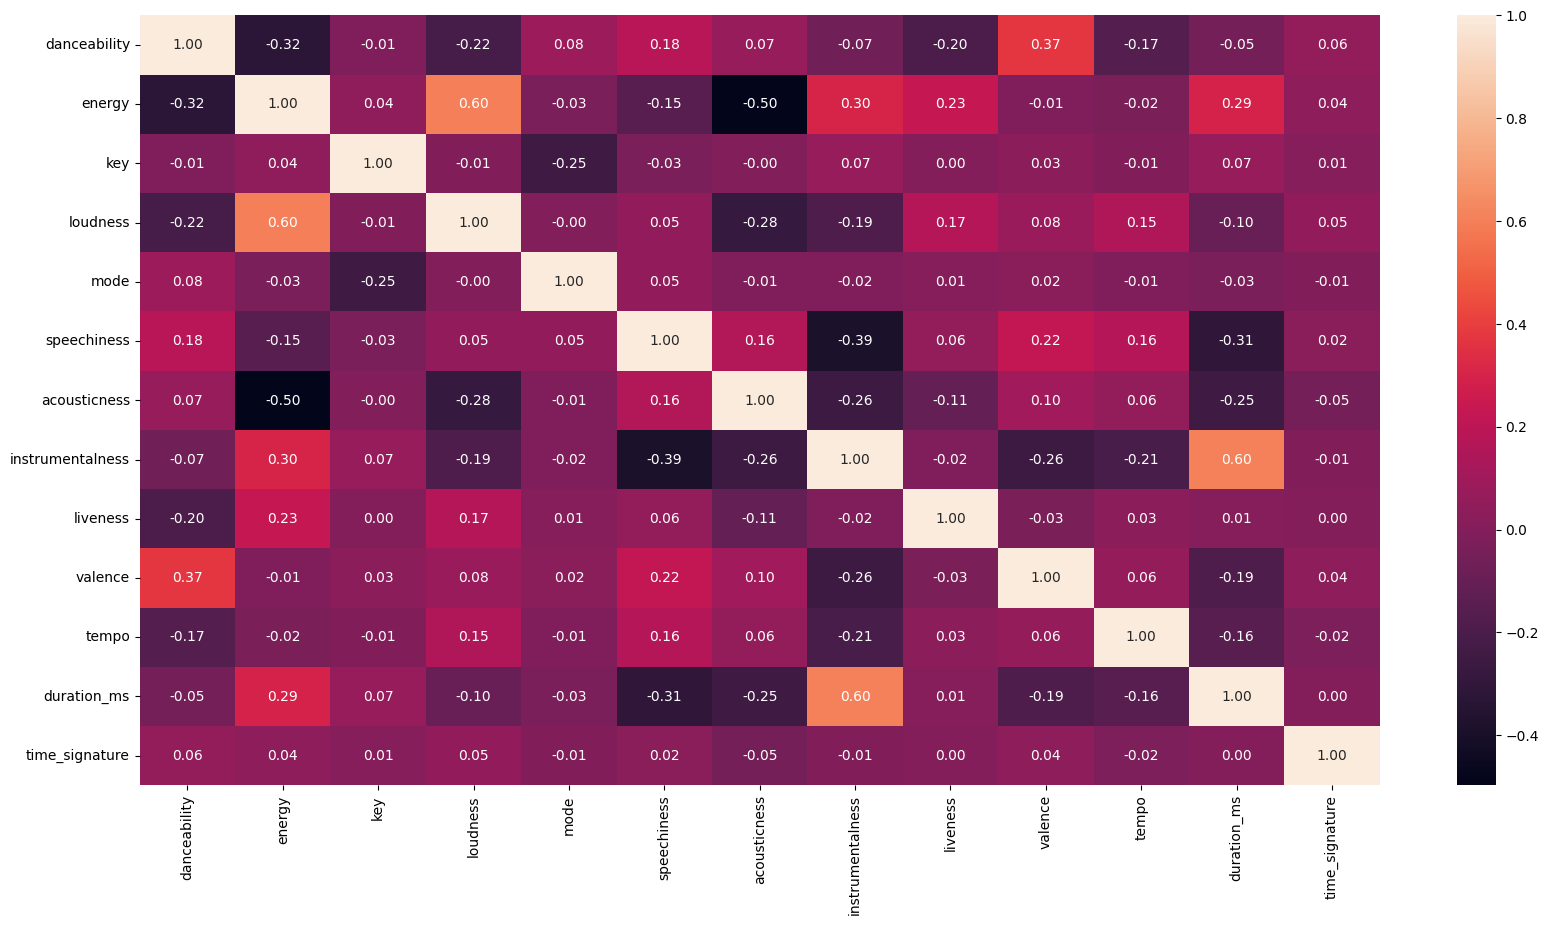

In [20]:
#Heatmap of Correlation between the numerical features
plt.figure(figsize=(20,10))
numerical_data= data1.drop('genre', axis=1)
sns.heatmap(numerical_data.corr(), annot=True, fmt=".2f")

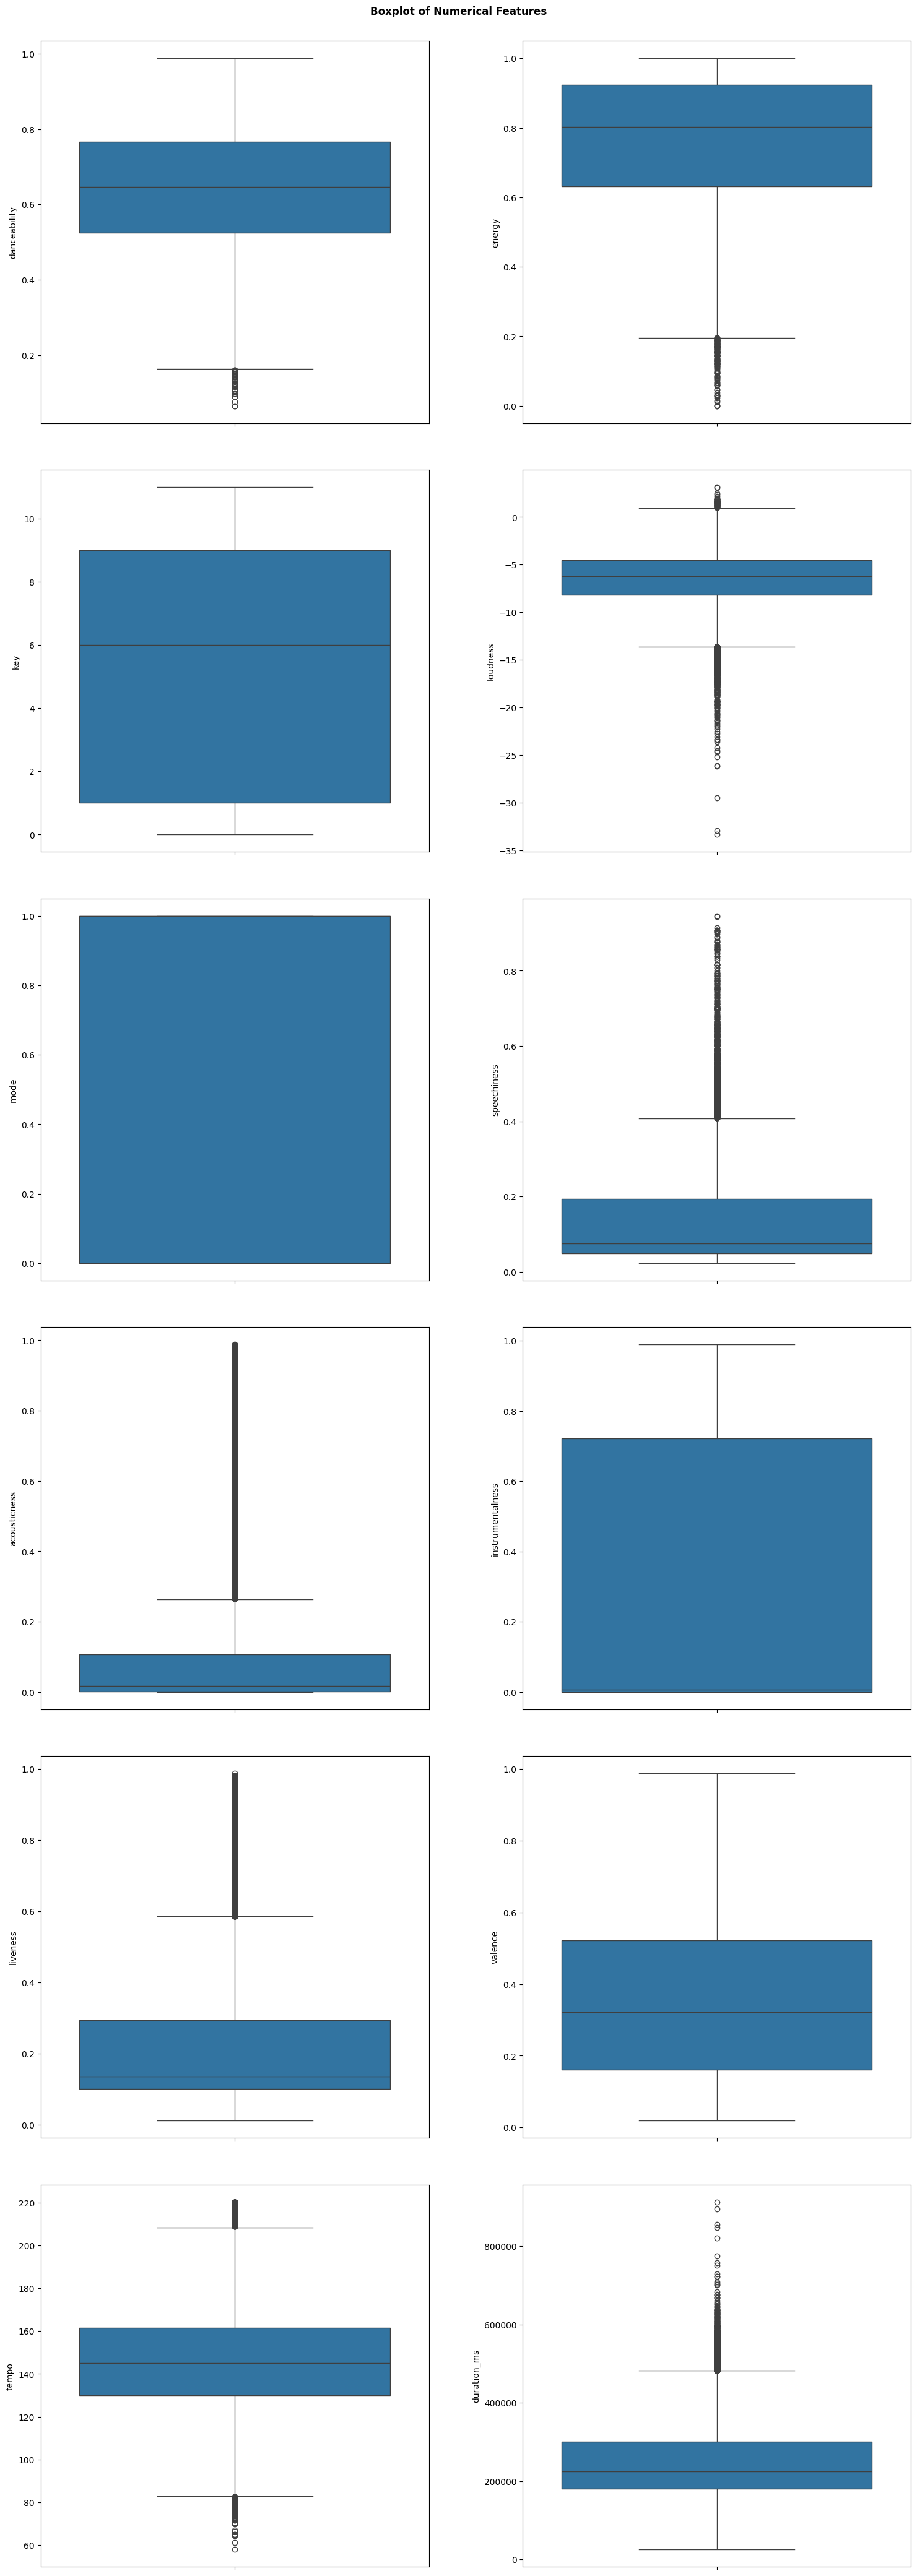

In [32]:
#Checking for outliers
#Creating a boxplot for each feature

plt.figure(figsize=(16,50))
plt.suptitle("Boxplot of Numerical Features", fontweight='bold')

for i, col in enumerate(data1.columns[:-2]):
    plt.subplot(7,2, i+1)
    sns.boxplot(data1[col])
    plt.tight_layout(pad=5)

In [107]:
#Separating Numerical and Categorical Columns
numerical_cols= data1.select_dtypes(include=[np.number]).columns
categorical_cols= data1.select_dtypes(exclude=[np.number]).columns
numerical_data= data1[numerical_cols]
categorical_data= data1[categorical_cols]

In [105]:
#Finding outliers using zscore


def get_outliers(df, threshold):
    df= df.copy(deep=True)
    threshold_z_score= stats.norm.ppf(threshold)
    z_score_df= pd.DataFrame(np.abs(stats.zscore(df)), columns=df.columns)
    sum_of_outliers= (z_score_df > threshold_z_score).sum(axis=0)
    
    return sum_of_outliers
    

In [108]:
def drop_outliers(df, threshold):
    df= df.copy(deep=True)
    threshold_z_score= stats.norm.ppf(threshold)
    z_score_df= pd.DataFrame(np.abs(stats.zscore(df)), columns=df.columns)
    outliers= (z_score_df > threshold_z_score).sum(axis=1)
    outliers= outliers > 0
    outlier_indices= df.index[outliers]
    
    #Dropping Outliers and resetting index
    df= df.drop(outlier_indices, axis=0).reset_index(drop=True)
    
    return df

In [114]:
get_outliers(numerical_data, 0.99994)

danceability          0
energy               13
key                   0
loudness             89
mode                  0
speechiness         206
acousticness        615
instrumentalness      0
liveness            294
valence               0
tempo                 0
duration_ms          27
time_signature      150
dtype: int64

In [116]:
cleaned_numerical_data= drop_outliers(numerical_data, 0.99994)
cat_data= categorical_data.copy(deep=True)
cleaned_categorical_data = cat_data.loc[cleaned_numerical_data.index].reset_index(drop=True)

#Concatenating cleaned numerical data with categorical data
cleaned_data= pd.concat([cleaned_numerical_data, cleaned_categorical_data], axis=1)

ANALYSIS WITH CLEANED DATA (OUTLIERS REMOVED)

In [119]:
#Splitting the cleaned data into train and test sets
X= cleaned_data.drop('genre', axis=1)
y= cleaned_data['genre']

X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.3, random_state=42)

In [120]:
#Encoding the genre column
le= LabelEncoder()
y_train= le.fit_transform(y_train)
y_test=le.transform(y_test)

In [122]:
#Standardizing the Numerical Features
scaler= StandardScaler()
X_train_scaled= scaler.fit_transform(X_train)
X_test_scaled= scaler.transform(X_test)

In [125]:
#Applying PCA for dimensionality reduction
pca= PCA()
X_pca= pca.fit(X_train_scaled)
explained_variance= pca.explained_variance_ratio_ * 100

#Principal Components with corresponding explained variances
for i, variance in enumerate(explained_variance):
    print(f"PCA {i+1} : {variance : .4f}")

PCA 1 :  20.3473
PCA 2 :  14.8098
PCA 3 :  9.7711
PCA 4 :  9.4987
PCA 5 :  7.5578
PCA 6 :  7.1790
PCA 7 :  6.5075
PCA 8 :  5.6361
PCA 9 :  5.3833
PCA 10 :  5.0212
PCA 11 :  3.6448
PCA 12 :  2.9800
PCA 13 :  1.6634


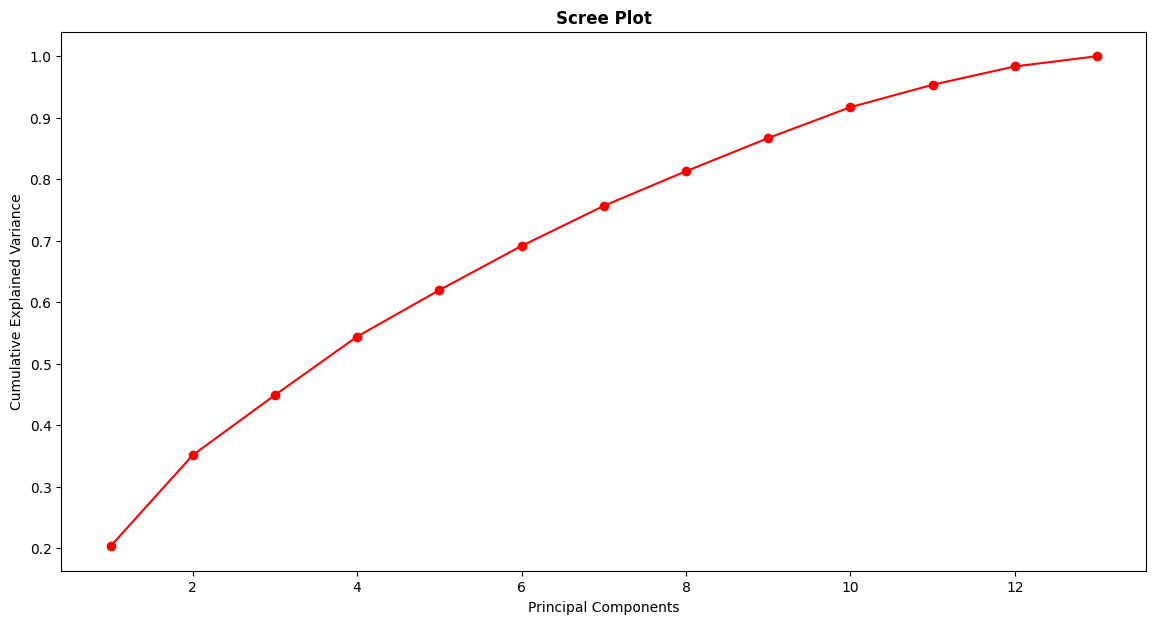

In [131]:
#Scree Plot 
cumulative_explained_variance= np.cumsum(pca.explained_variance_ratio_)

plt.figure(figsize=(14,7))
plt.plot(range(1, len(explained_variance)+1), cumulative_explained_variance, marker='o', color='red')
plt.title("Scree Plot", fontweight='bold')
plt.xlabel("Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.show()

In [245]:
pca_new= PCA(n_components=10)
X_train_pca= pca_new.fit_transform(X_train_scaled)
X_test_pca= pca_new.transform(X_test_scaled)

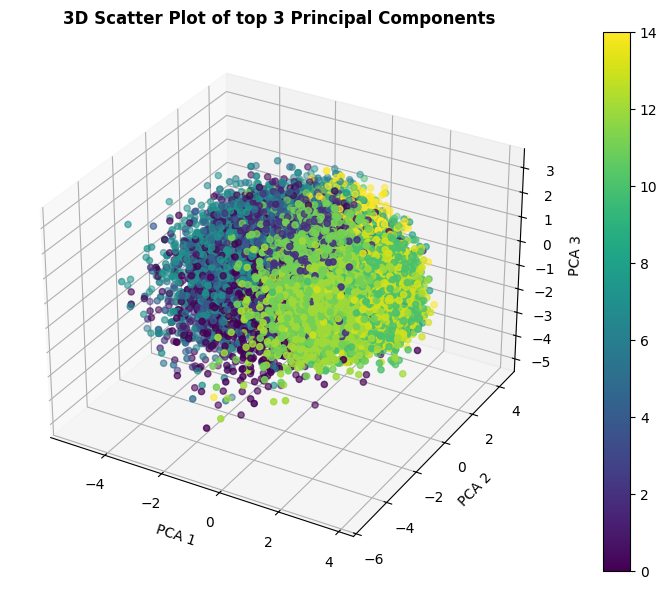

In [204]:
#3d scatter plot with top 3 Principal Components

fig= plt.figure(figsize=(14,7))
ax= fig.add_subplot(111, projection= '3d')
sc= ax.scatter(X_train_pca[:,0], X_train_pca[:,1],X_train_pca[:,2], c=y_train, cmap="viridis")
ax.set_title("3D Scatter Plot of top 3 Principal Components", fontweight='bold')
ax.set_xlabel("PCA 1")
ax.set_ylabel("PCA 2")
ax.set_zlabel("PCA 3")
plt.colorbar(sc)
plt.show()

In [151]:
#Applying LDA for dimensionality Reduction
n_features= X_train.shape[1]
k= len(np.unique(y))
lda= LinearDiscriminantAnalysis(n_components=min(n_features, k-1))
X_train_lda= lda.fit_transform(X_train_scaled, y_train)
X_test_lda= lda.transform(X_test_scaled)

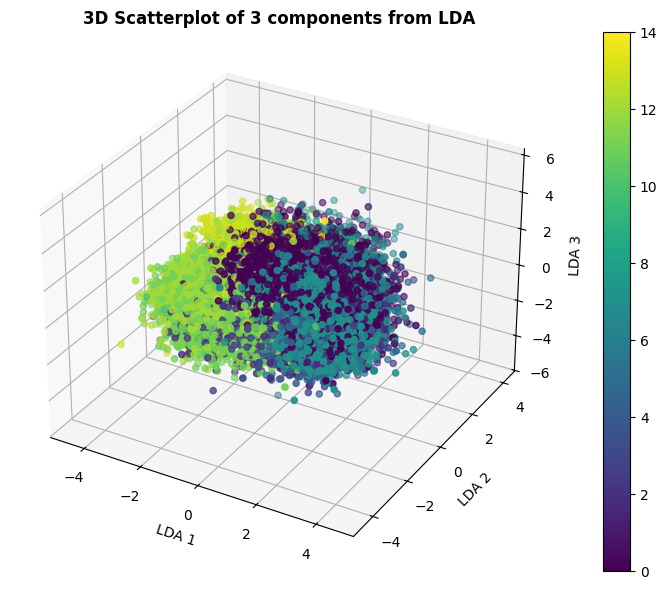

In [152]:
#3D Scatter Plot of 3 components from LDA

fig=plt.figure(figsize=(14,7))
ax= plt.subplot(111, projection= '3d')
sc_lda= ax.scatter(X_train_lda[:,0], X_train_lda[:,1], X_train_lda[:,2], c=y_train, cmap="viridis")
ax.set_title("3D Scatterplot of 3 components from LDA", fontweight='bold')
ax.set_xlabel("LDA 1")
ax.set_ylabel("LDA 2")
ax.set_zlabel("LDA 3")
plt.colorbar(sc_lda)
plt.show()

In [160]:
#Analysis of Variance(ANOVA)

selector= SelectKBest(score_func=f_classif, k='all')
X_anova= selector.fit(X_train_scaled, y_train)
anova_scores= selector.scores_

for i, score in enumerate(anova_scores):
    print(f"{X.columns[i]} : {score: .4f}")

danceability :  836.1995
energy :  1166.6312
key :  13.9755
loudness :  775.0654
mode :  49.4052
speechiness :  458.6558
acousticness :  460.6294
instrumentalness :  1673.8150
liveness :  112.1610
valence :  567.6926
tempo :  467.2393
duration_ms :  1552.4767
time_signature :  6.6050


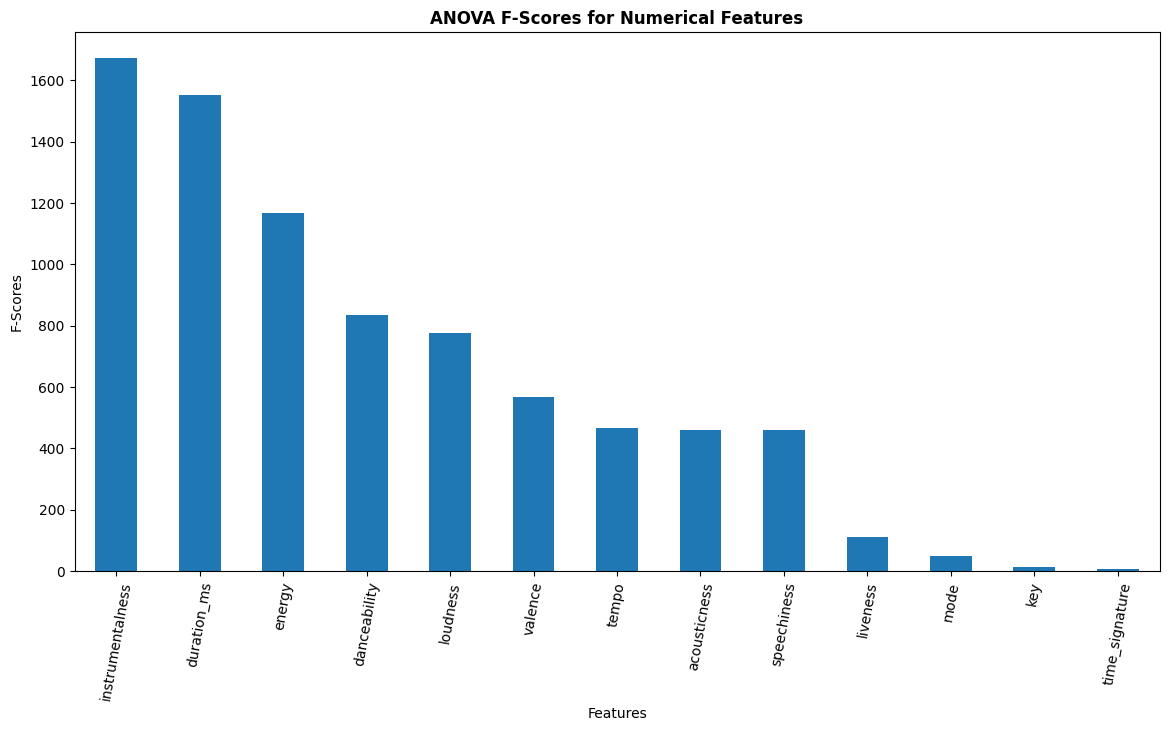

In [178]:
values=pd.Series(anova_scores, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(14,7))
values.plot.bar()
plt.title("ANOVA F-Scores for Numerical Features", fontweight='bold')
plt.xlabel("Features")
plt.ylabel("F-Scores")
plt.xticks(rotation=80)
plt.show()

In [254]:
#Fitting the training data with top 10 features with highest ANOVA scores
selector_new= SelectKBest(score_func=f_classif, k=4)
X_train_anova= selector.fit_transform(X_train_scaled, y_train)
X_test_anova= selector.transform(X_test_scaled)

In [185]:
#MODEL DEVELOPMENT

#Mutinomial Logistic Regression

logreg= LogisticRegression(max_iter=1000, solver="lbfgs")

In [246]:
#Fitting the Logistic Regression model using the principal components

logreg.fit(X_train_pca, y_train)
y_pred_pca= logreg.predict(X_test_pca)
print(classification_report(y_pred_pca, y_test))

              precision    recall  f1-score   support

           0       0.36      0.31      0.33      1627
           1       0.03      0.18      0.06        92
           2       0.14      0.23      0.18       579
           3       0.00      0.00      0.00         6
           4       0.04      0.41      0.08        56
           5       0.10      0.25      0.14       224
           6       0.11      0.25      0.15       257
           7       0.68      0.39      0.49      3074
           8       0.50      0.40      0.44      1133
           9       0.32      0.35      0.34       442
          10       0.37      0.45      0.41       721
          11       0.61      0.45      0.52      1173
          12       0.43      0.42      0.43       926
          13       0.45      0.43      0.44       954
          14       0.42      0.37      0.39      1030

    accuracy                           0.38     12294
   macro avg       0.30      0.33      0.29     12294
weighted avg       0.47   

In [187]:
#Fitting the Logistic Regression model using the Linear Discriminants

logreg.fit(X_train_lda, y_train)
y_pred_lda= logreg.predict(X_test_lda)
print(classification_report(y_pred_lda, y_test))

              precision    recall  f1-score   support

           0       0.41      0.46      0.44      1276
           1       0.13      0.20      0.16       336
           2       0.14      0.26      0.18       489
           3       0.00      0.00      0.00        14
           4       0.13      0.23      0.17       294
           5       0.24      0.28      0.26       496
           6       0.11      0.24      0.15       263
           7       0.68      0.42      0.52      2848
           8       0.45      0.39      0.42      1061
           9       0.39      0.37      0.38       506
          10       0.37      0.44      0.40       749
          11       0.64      0.48      0.55      1143
          12       0.42      0.45      0.43       835
          13       0.48      0.45      0.47       967
          14       0.47      0.41      0.44      1017

    accuracy                           0.40     12294
   macro avg       0.34      0.34      0.33     12294
weighted avg       0.47   

In [255]:
#Fitting the Logistic Regression using the most important features from ANOVA

logreg.fit(X_train_anova, y_train)
y_pred_anova= logreg.predict(X_test_anova)
print(classification_report(y_pred_anova, y_test))

              precision    recall  f1-score   support

           0       0.41      0.46      0.44      1273
           1       0.13      0.19      0.15       336
           2       0.14      0.26      0.18       487
           3       0.00      0.00      0.00        14
           4       0.13      0.23      0.17       295
           5       0.24      0.28      0.26       497
           6       0.11      0.23      0.15       262
           7       0.68      0.42      0.52      2851
           8       0.45      0.39      0.42      1064
           9       0.39      0.37      0.38       505
          10       0.37      0.44      0.40       747
          11       0.64      0.48      0.55      1143
          12       0.42      0.45      0.43       836
          13       0.48      0.45      0.47       966
          14       0.47      0.41      0.44      1018

    accuracy                           0.40     12294
   macro avg       0.34      0.34      0.33     12294
weighted avg       0.47   

In [207]:
#Fitting the Logistic Regression using the initial train and test sets
logreg.fit(X_train_scaled, y_train)
y_pred_logreg_init= logreg.predict(X_test_scaled)
print(classification_report(y_test, y_pred_logreg_init))

              precision    recall  f1-score   support

           0       0.46      0.41      0.44      1421
           1       0.19      0.13      0.15       505
           2       0.26      0.14      0.18       928
           3       0.00      0.00      0.00       138
           4       0.23      0.13      0.17       539
           5       0.28      0.24      0.26       570
           6       0.23      0.11      0.15       570
           7       0.42      0.68      0.52      1773
           8       0.39      0.45      0.42       923
           9       0.37      0.39      0.38       487
          10       0.44      0.37      0.40       882
          11       0.48      0.64      0.55       861
          12       0.45      0.42      0.43       901
          13       0.45      0.48      0.47       903
          14       0.41      0.47      0.44       893

    accuracy                           0.40     12294
   macro avg       0.34      0.34      0.33     12294
weighted avg       0.38   

In [193]:
#Random Forest

rf= RandomForestClassifier(n_estimators=100, random_state=42)

In [194]:
#Fitting the Random Forest Classifier on the principal components
rf.fit(X_train_pca,y_train)
y_pred_rf_pca= rf.predict(X_test_pca)
print(classification_report(y_test, y_pred_rf_pca))

              precision    recall  f1-score   support

           0       0.40      0.39      0.40      1421
           1       0.30      0.18      0.23       505
           2       0.27      0.16      0.20       928
           3       0.03      0.01      0.02       138
           4       0.31      0.17      0.22       539
           5       0.22      0.19      0.20       570
           6       0.18      0.12      0.15       570
           7       0.36      0.54      0.43      1773
           8       0.45      0.52      0.48       923
           9       0.46      0.49      0.47       487
          10       0.48      0.41      0.44       882
          11       0.49      0.56      0.52       861
          12       0.49      0.48      0.48       901
          13       0.44      0.50      0.47       903
          14       0.41      0.43      0.42       893

    accuracy                           0.39     12294
   macro avg       0.35      0.34      0.34     12294
weighted avg       0.38   

In [200]:
#Fitting the Random Forest Classifier on the Linear Discriminants

rf.fit(X_train_lda, y_train)
y_pred_rf_lda= rf.predict(X_test_lda)
print(classification_report(y_test, y_pred_rf_lda))

              precision    recall  f1-score   support

           0       0.45      0.44      0.45      1421
           1       0.35      0.26      0.30       505
           2       0.27      0.17      0.21       928
           3       0.02      0.01      0.01       138
           4       0.33      0.21      0.26       539
           5       0.30      0.32      0.31       570
           6       0.17      0.11      0.13       570
           7       0.39      0.55      0.46      1773
           8       0.47      0.52      0.50       923
           9       0.46      0.45      0.45       487
          10       0.50      0.43      0.46       882
          11       0.50      0.58      0.54       861
          12       0.51      0.47      0.49       901
          13       0.47      0.54      0.50       903
          14       0.43      0.47      0.45       893

    accuracy                           0.42     12294
   macro avg       0.37      0.37      0.37     12294
weighted avg       0.41   

In [256]:
#Fitting the Random Forest Classifier on the most important features from ANOVA

rf.fit(X_train_anova, y_train)
y_pred_rf_anova= rf.predict(X_test_anova)
print(classification_report(y_test, y_pred_rf_anova))

              precision    recall  f1-score   support

           0       0.50      0.49      0.50      1421
           1       0.40      0.31      0.35       505
           2       0.32      0.20      0.25       928
           3       0.02      0.01      0.01       138
           4       0.40      0.25      0.31       539
           5       0.30      0.32      0.31       570
           6       0.20      0.13      0.16       570
           7       0.41      0.57      0.47      1773
           8       0.51      0.60      0.55       923
           9       0.52      0.60      0.56       487
          10       0.55      0.52      0.54       882
          11       0.54      0.62      0.58       861
          12       0.56      0.52      0.54       901
          13       0.54      0.56      0.55       903
          14       0.48      0.44      0.46       893

    accuracy                           0.46     12294
   macro avg       0.42      0.41      0.41     12294
weighted avg       0.45   

In [208]:
#Fitting the Random Forest Classifier on the initial train and test sets

rf.fit(X_train_scaled, y_train)
y_pred_rf_init= rf.predict(X_test_scaled)
print(classification_report(y_test, y_pred_rf_init))

              precision    recall  f1-score   support

           0       0.50      0.49      0.50      1421
           1       0.40      0.31      0.35       505
           2       0.32      0.20      0.25       928
           3       0.02      0.01      0.01       138
           4       0.40      0.25      0.31       539
           5       0.30      0.32      0.31       570
           6       0.20      0.13      0.16       570
           7       0.41      0.57      0.47      1773
           8       0.51      0.60      0.55       923
           9       0.52      0.60      0.56       487
          10       0.55      0.52      0.54       882
          11       0.54      0.62      0.58       861
          12       0.56      0.52      0.54       901
          13       0.54      0.56      0.55       903
          14       0.48      0.44      0.46       893

    accuracy                           0.46     12294
   macro avg       0.42      0.41      0.41     12294
weighted avg       0.45   

ANALYSIS WITH RAW DATA WITH NO OUTLIERS REMOVED

In [210]:
raw_data= data1.copy(deep=True)

X_raw= raw_data.drop('genre', axis=1)
y_raw= raw_data['genre']

#Splitting into train and set sets
xtrain, xtest, ytrain,ytest= train_test_split(X_raw, y_raw, test_size=0.3, random_state=42)

#Standardizing the X features
xtrain_scaled= scaler.fit_transform(xtrain)
xtest_scaled= scaler.transform(xtest)

#Encoding the y column (Genre)
ytrain= le.fit_transform(ytrain)
ytest= le.transform(ytest)

In [216]:
#Principal Components Analysis
pcaa_raw= PCA()
xtrain_pca= pcaa_raw.fit(xtrain_scaled)
explained_variance_raw= pcaa_raw.explained_variance_ratio_*100

for i, variance in enumerate(explained_variance_raw):
    print(f" PCA {i+1} : {variance: .4f}")

 PCA 1 :  19.9392
 PCA 2 :  14.7366
 PCA 3 :  10.2683
 PCA 4 :  9.5725
 PCA 5 :  7.4571
 PCA 6 :  7.1862
 PCA 7 :  6.5350
 PCA 8 :  5.6679
 PCA 9 :  5.5699
 PCA 10 :  4.8567
 PCA 11 :  3.5819
 PCA 12 :  3.0234
 PCA 13 :  1.6052


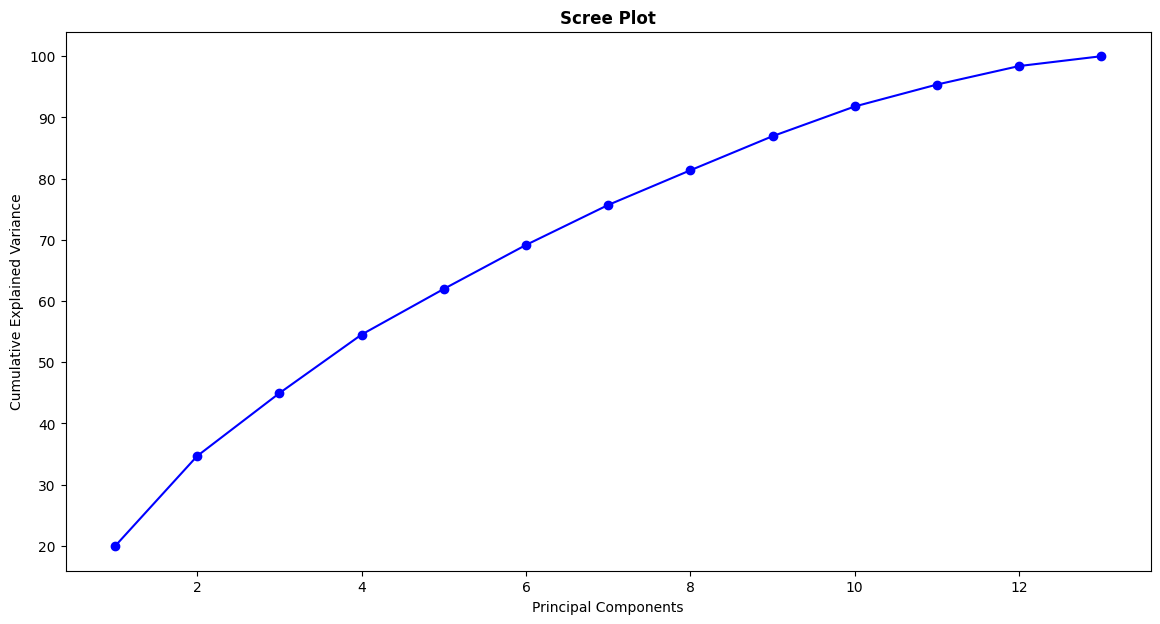

In [218]:
cum_explained_variance = np.cumsum(explained_variance_raw)

#Scree Plot
plt.figure(figsize=(14,7))
plt.plot(range(1, len(explained_variance_raw)+1), cum_explained_variance, marker='o', color='blue')
plt.title("Scree Plot", fontweight='bold')
plt.xlabel("Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.show()

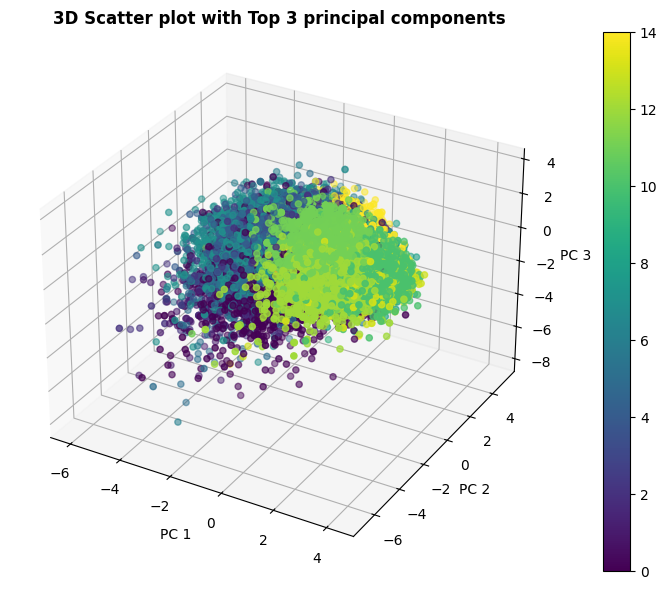

In [249]:
pca_raw= PCA(n_components=10)
xtrain_pca=pca_raw.fit_transform(xtrain_scaled)
xtest_pca=pca_raw.transform(xtest_scaled)

#3D Scatter plot with Top 3 pricincipal components
fig= plt.figure(figsize=(14,7))
ax= plt.subplot(111, projection='3d')
sc= ax.scatter(xtrain_pca[:,0], xtrain_pca[:,1], xtrain_pca[:,2], c=ytrain, cmap="viridis")
ax.set_title("3D Scatter plot with Top 3 principal components", fontweight='bold')
ax.set_xlabel("PC 1")
ax.set_ylabel("PC 2")
ax.set_zlabel("PC 3")
plt.colorbar(sc)
plt.show()


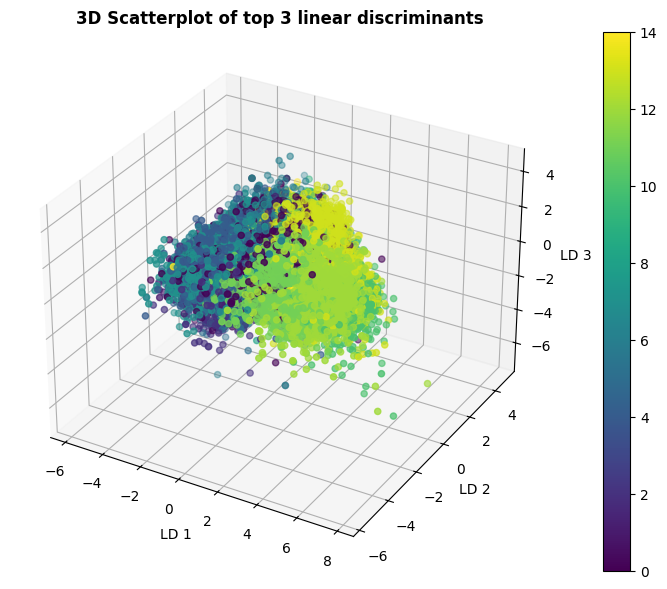

In [221]:
#Linear Discriminant Analysis

lda_raw= LinearDiscriminantAnalysis(n_components=min(n_features, k-1))
xtrain_lda= lda_raw.fit_transform(xtrain_scaled, ytrain)
xtest_lda= lda_raw.transform(xtest_scaled)

#3D Scatter plot of top 3 Linear discriminants

fig=plt.figure(figsize=(14,7))
ax=plt.subplot(111, projection='3d')
sca= ax.scatter(xtrain_lda[:,0],xtrain_lda[:,1],xtrain_lda[:,2], c=ytrain, cmap="viridis")
ax.set_title("3D Scatterplot of top 3 linear discriminants", fontweight='bold')
ax.set_xlabel("LD 1")
ax.set_ylabel("LD 2")
ax.set_zlabel("LD 3")
plt.colorbar(sca)
plt.show()

In [230]:
#Analysis of Variance (ANOVA)
selector_raw= SelectKBest(score_func=f_classif, k='all')
xtrain_anova= selector_raw.fit(xtrain_scaled, ytrain)

anovaScores= selector_raw.scores_
for i, score in enumerate(anovaScores):
    print(f"{X.columns[i]} : {score: .2f}")

danceability :  1305.80
energy :  1393.09
key :  21.21
loudness :  997.94
mode :  62.32
speechiness :  758.09
acousticness :  508.52
instrumentalness :  2920.64
liveness :  178.38
valence :  761.18
tempo :  920.34
duration_ms :  3304.07
time_signature :  8.68


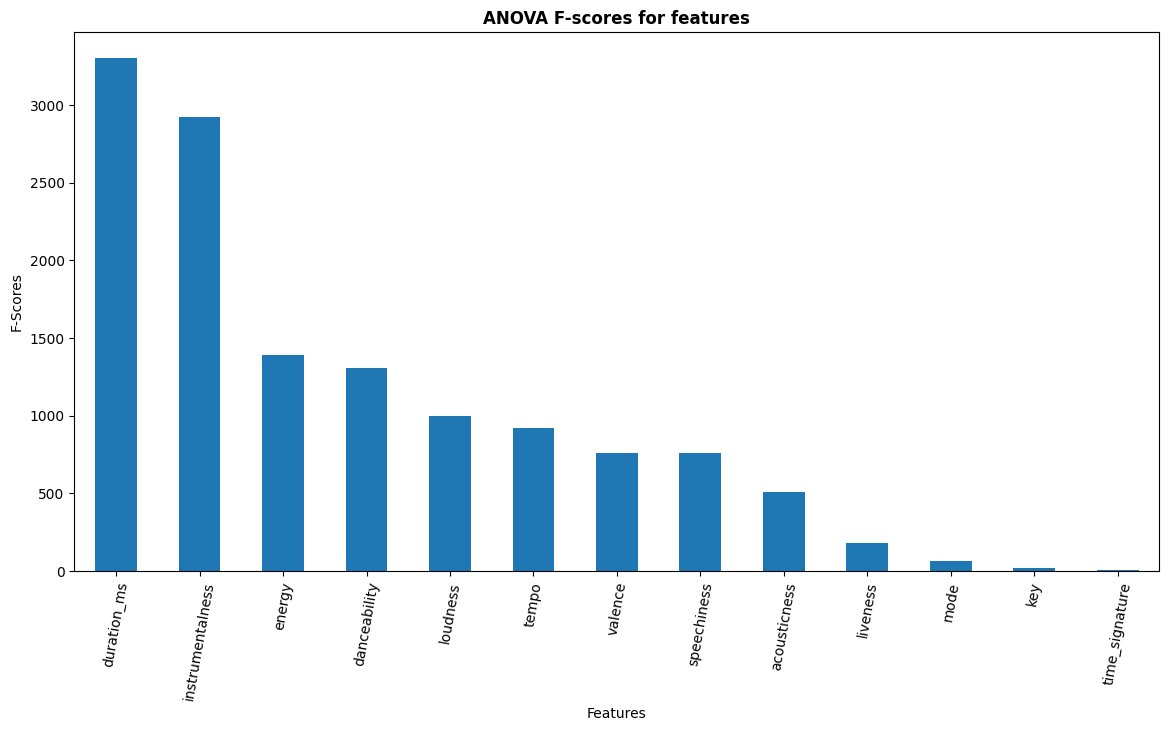

In [233]:
val=pd.Series(anovaScores, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(14,7))
val.plot.bar()
plt.title("ANOVA F-scores for features", fontweight='bold')
plt.xlabel("Features")
plt.ylabel("F-Scores")
plt.xticks(rotation=80)
plt.show()

In [240]:
selector_raw_new= SelectKBest(score_func=f_classif, k=3)
xtrain_anova= selector_raw_new.fit_transform(xtrain_scaled, ytrain)
xtest_anova= selector_raw_new.transform(xtest_scaled)

In [250]:
#Model development with new train and test sets

#Logistic Regression with PCA sets
logreg.fit(xtrain_pca, ytrain)
ypred_logreg_pca= logreg.predict(xtest_pca)
print(classification_report(ytest, ypred_logreg_pca))

              precision    recall  f1-score   support

           0       0.35      0.33      0.34      1421
           1       0.37      0.32      0.34       516
           2       0.46      0.32      0.38       911
           3       0.20      0.01      0.01       146
           4       0.43      0.23      0.30       529
           5       0.36      0.10      0.16       596
           6       0.42      0.19      0.26       577
           7       0.42      0.66      0.51      1782
           8       0.73      0.82      0.77       908
           9       0.54      0.60      0.57       885
          10       0.80      0.84      0.82       904
          11       0.69      0.78      0.73       866
          12       0.77      0.80      0.78       894
          13       0.55      0.55      0.55       876
          14       0.62      0.69      0.65       881

    accuracy                           0.54     12692
   macro avg       0.51      0.48      0.48     12692
weighted avg       0.53   

In [251]:
#Logistic Regression with Linear Discriminants
logreg.fit(xtrain_lda, ytrain)
ypred_logreg_lda= logreg.predict(xtest_lda)
print(classification_report(ytest,ypred_logreg_lda))

              precision    recall  f1-score   support

           0       0.50      0.38      0.43      1421
           1       0.43      0.48      0.45       516
           2       0.47      0.37      0.41       911
           3       0.40      0.01      0.03       146
           4       0.43      0.29      0.34       529
           5       0.40      0.31      0.35       596
           6       0.46      0.27      0.34       577
           7       0.45      0.66      0.54      1782
           8       0.77      0.83      0.80       908
           9       0.59      0.65      0.62       885
          10       0.82      0.85      0.83       904
          11       0.72      0.79      0.75       866
          12       0.79      0.80      0.80       894
          13       0.64      0.66      0.65       876
          14       0.70      0.72      0.71       881

    accuracy                           0.59     12692
   macro avg       0.57      0.54      0.54     12692
weighted avg       0.58   